# Entrega 1
#### ManyBody - Claudia Garcia, Adrià Rojo - Abril 2025

In [13]:
import numpy as np
import numpy.typing as npt
import sympy as sp
import scipy.interpolate as scint
import matplotlib.pyplot as plt
from tqdm import tqdm


def second_derivative(fun: npt.ArrayLike, h: float) -> npt.ArrayLike:
    first = np.gradient(fun, h)
    return np.gradient(first, h)

scattering_length, width, step, atom_numbers, time_step, alpha, iterations = \
    0.00433, 400, 0.015, 10000, 0.0001, 0.8, 40000
    # 0.00433, 700, 0.015, 1000000, 0.00005, 0.3, 70000
    # 0.00433, 600, 0.015, 100000, 0.0001, 0.4, 50000
    # 0.00433, 400, 0.020, 1000, 0.0001, 0.5, 50000
    # 0.00433, 300, 0.020, 100, 0.0001, 0.5, 50000  

alpha2 = alpha*alpha
cvar = 2 * np.power(alpha, 3/2)/ np.power(np.pi, 1/4)
interaction = 0
# interaction = scattering_length*atom_numbers
density_param = atom_numbers*scattering_length*scattering_length*scattering_length

rs = np.array([i * step for i in range(width)])
r2s = rs**2
psi = np.array([cvar*r*np.exp(-0.5*alpha2*r2) for (r, r2) in zip(rs, r2s)])

In [ ]:
psi_curr = psi
energies = []
for i in tqdm(range(iterations)):
    psi_dx2 = second_derivative(psi_curr, step)
    local_energy_mu = [(-(curr*dx2+r2*curr**2+interaction*r2*(curr/r if r != 0 else 0)**4)/2, 
                        ((-dx2/curr if curr != 0 else 0) + r2 + interaction*(curr/r if r != 0 else 0)**2)/2)
                     for r, r2, curr, dx2 in zip(rs, r2s, psi_curr, psi_dx2)]
    local_energy, local_mu = zip(*local_energy_mu)
    energy = sum(local_energy)*step
    energies.append(energy)
    psi_next = [curr*(1 - time_step*mu) for curr, mu in zip(psi_curr, local_mu)]
    normalization_const = np.sqrt(sum(next*next for next in psi_next)*step)
    psi_curr = np.array(psi_next)/normalization_const

100%|██████████| 40000/40000 [00:23<00:00, 1721.86it/s]


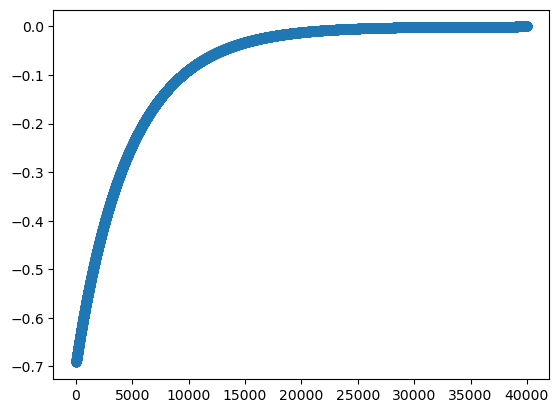

In [12]:
plt.scatter(range(iterations), energies)